In [1]:
#nothing

In [1]:
import sys
sys.executable


'/anaconda3/bin/python'

In [2]:
#pandas for data analysis
import numpy
import pandas as pd
#to scale data
from sklearn.preprocessing import StandardScaler
#to encode data (categorical to numerical)
from sklearn.preprocessing import LabelEncoder
#to plot data
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
#to import to jupyter from jupyter


ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/anaconda3/lib/python3.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [ ]:
import numpy
import re
import numpy as np

# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv("stockData31.csv")
rankingsDF = data[['Stock Name', 'Change', 'Zacks Ranks', 'Yahoo Ranks', 'The Street Ranks', 'Investor Place']].copy()

In [6]:
scale_mapper_zacks = {'5-StrongSell': 1, 
                '4-Sell': 2,
                '3-Hold': 3,
                '2-Buy': 4,
                '1-StrongBuy': 5}
scale_mapper_yahoo = {
                'STRONG SELL':0,
                'SELL': 1, 
                'UNDERPERFORM': 2,
                'HOLD': 3,
                'BUY': 4,
                'STRONG BUY': 5}
scale_mapper_thestreet = {'(Sell)': 1, 
                '(Hold)': 2,
                '(Buy)': 3}
scale_mapper_investor = {'F': 1, 
                'D': 2,
                'C': 3,
                'B': 4,
                'A': 5}

def streetRate(row):
    val = row["The Street Ranks"]
    match = re.search(r'\(\w+\)', val) # found, match.group() == "123"
    if match:
        return match.group()
    else:
        return None

rankingsDF['streetRating'] = rankingsDF.apply (lambda row: streetRate(row), axis=1)
rankingsDF['Zacks Ranks'] = rankingsDF['Zacks Ranks'].str.replace(" ","")
rankingsDF['scaleZacks'] = rankingsDF['Zacks Ranks'].replace(scale_mapper_zacks)
rankingsDF['scaleYahoo'] = rankingsDF['Yahoo Ranks'].replace(scale_mapper_yahoo)
rankingsDF['scaleStreet'] = rankingsDF['streetRating'].replace(scale_mapper_thestreet)
rankingsDF['scaleInvestor'] = rankingsDF['Investor Place'].replace(scale_mapper_investor)

In [7]:
len(rankingsDF)

1843

In [8]:
rankingsDF = rankingsDF.dropna()
rankingsDF = rankingsDF.mask(rankingsDF.eq('None')).dropna() #this is yahoo
rankingsDF = rankingsDF.mask(rankingsDF.eq('Total Grade:')).dropna()
rankingsDF = rankingsDF.mask(rankingsDF.eq(']')).dropna()

In [9]:
rankingsDF.head()

,Stock Name,Change,Zacks Ranks,Yahoo Ranks,The Street Ranks,Investor Place,streetRating,scaleZacks,scaleYahoo,scaleStreet,scaleInvestor
3,EDN,-1.33%,5-StrongSell,HOLD,D+ (Sell),F,(Sell),1,3,1.0,1
6,KMX,3.48%,3-Hold,BUY,B (Buy),B,(Buy),3,4,3.0,4
9,RHT,-0.24%,3-Hold,HOLD,B (Buy),B,(Buy),3,3,3.0,4
13,FDS,-2.75%,3-Hold,HOLD,A+ (Buy),A,(Buy),3,3,3.0,5
15,LEN,-6.21%,3-Hold,BUY,B (Buy),B,(Buy),3,4,3.0,4


In [17]:
#check out current dataframe
# bins = data['pricediff'].quantile(np.arange(0, 1.1, 0.25))
bins = [-1000, 2, 1000]

#bins = [-1000, 0, 1000]
labels = np.arange(0, len(bins) - 1)

#remove % signs and convert to numerical var (float)
rankingsDF['pricediff'] = rankingsDF['Change'].str[:-1]
rankingsDF['pricediff'] = rankingsDF['pricediff'].astype(float)
#Convert Purchase (labels) to categories
rankingsDF["results"] = pd.cut(rankingsDF["pricediff"], bins=bins,labels=labels)
rankingsDF['results'].unique()

rankingsDF.reset_index(drop=True, inplace=True)
#rankingsDF = rankingsDF.drop(['Change', 'pricediff'], axis=1)

In [18]:
rankingsDF.head()

,Stock Name,Change,Zacks Ranks,Yahoo Ranks,The Street Ranks,Investor Place,streetRating,scaleZacks,scaleYahoo,scaleStreet,scaleInvestor,pricediff,results
0,EDN,-1.33%,5-StrongSell,HOLD,D+ (Sell),F,(Sell),1,3,1.0,1,-1.33,0
1,KMX,3.48%,3-Hold,BUY,B (Buy),B,(Buy),3,4,3.0,4,3.48,1
2,RHT,-0.24%,3-Hold,HOLD,B (Buy),B,(Buy),3,3,3.0,4,-0.24,0
3,FDS,-2.75%,3-Hold,HOLD,A+ (Buy),A,(Buy),3,3,3.0,5,-2.75,0
4,LEN,-6.21%,3-Hold,BUY,B (Buy),B,(Buy),3,4,3.0,4,-6.21,0


In [15]:
print(rankingsDF.columns)
len(rankingsDF)

Index(['Stock Name', 'Change', 'Zacks Ranks', 'Yahoo Ranks',
       'The Street Ranks', 'Investor Place', 'streetRating', 'scaleZacks',
       'scaleYahoo', 'scaleStreet', 'scaleInvestor'],
      dtype='object')


1164

In [53]:
#predictor vars
X = rankingsDF[['scaleZacks', 'scaleYahoo', 'scaleStreet', 'scaleInvestor']].copy()
#X = rankingsDF[['scaleZacks', 'scaleStreet', 'scaleInvestor']].copy()
#labels
y = rankingsDF[['results']].copy()

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=5) 

#create RF model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
#model predictions
y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5542521994134897


Normalized confusion matrix


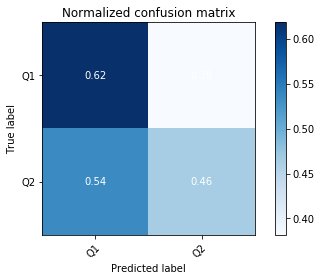

In [55]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    #classes = ["\$0-\$5886", "\$5886-\$8062", "\$8062-\$12074", "\$12074-\$24000"]
    #[0, 5886, 8062, 12074, 24000]
    classes = ["Q1", "Q2", "Q3", "Q4"]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

classes = labels
plot_confusion_matrix(y_test, y_pred, classes, normalize=True)

#Make New Predictions here!!

In [56]:
newData = pd.read_csv("July31-19-AllPredictors.csv")

In [57]:
len(newData)

344

In [58]:
X_test.head() #want it to look like this

,scaleZacks,scaleYahoo,scaleStreet,scaleInvestor
139,5,4,3.0,2
351,3,4,2.0,1
366,3,4,1.0,2
195,4,4,2.0,3
53,3,3,3.0,4


In [59]:
newData['streetRating'] = newData.apply (lambda row: streetRate(row), axis=1)
newData['Zacks Ranks'] = newData['Zacks Ranks'].str.replace(" ","")
newData['scaleZacks'] = newData['Zacks Ranks'].replace(scale_mapper_zacks)
newData['scaleYahoo'] = newData['Yahoo Ranks'].replace(scale_mapper_yahoo)
newData['scaleStreet'] = newData['streetRating'].replace(scale_mapper_thestreet)
newData['scaleInvestor'] = newData['Investor Place'].replace(scale_mapper_investor)
newData = newData.dropna()
newData = newData.mask(newData.eq('None')).dropna()  #this is yahoo
newData = newData.mask(newData.eq('Total Grade:')).dropna()
newData = newData.mask(newData.eq(']')).dropna()
len(newData)

276

In [60]:
newData.head()

,Stock Name,Stock Count,Company,Sector,Industry,Country,Market Cap,P/E,Price,Volume,...,52W High,52W Low,RSI,from Open,Gap,streetRating,scaleZacks,scaleYahoo,scaleStreet,scaleInvestor
0,AAWW,1,"Atlas Air Worldwide Holdings, Inc.",Services,"Air Services, Other",USA,1.20B,7.01,45.99,"215,056",...,-34.40%,30.68%,61.54,-1.29%,-0.45%,(Hold),3,4,2.0,2
1,ABC,2,AmerisourceBergen Corporation,Services,Drugs Wholesale,USA,18.61B,22.17,87.23,"731,931",...,-8.71%,24.83%,51.72,-2.41%,0.00%,(Hold),3,3,2.0,3
2,ABMD,3,"Abiomed, Inc.",Healthcare,Medical Appliances & Equipment,USA,12.62B,49.76,284.28,"340,349",...,-39.11%,22.78%,65.20,-0.16%,0.41%,(Buy),2,5,3.0,2
3,ACAD,1,ACADIA Pharmaceuticals Inc.,Healthcare,Biotechnology,USA,3.60B,-,25.64,"846,150",...,-11.20%,99.37%,51.88,0.91%,0.92%,(Sell),4,4,1.0,4
4,ADM,4,Archer-Daniels-Midland Company,Consumer Goods,Farm Products,USA,22.99B,14.09,41.59,"2,600,638",...,-20.64%,9.40%,60.53,1.15%,-0.24%,(Hold),2,4,2.0,2


In [61]:
newX = newData[['scaleZacks', 'scaleStreet', 'scaleInvestor','scaleYahoo']].copy()

In [62]:
print(newX)

    scaleZacks  scaleStreet scaleInvestor scaleYahoo
0            3          2.0             2          4
1            3          2.0             3          3
2            2          3.0             2          5
3            4          1.0             4          4
4            2          2.0             2          4
5            4          2.0             2          3
6            4          2.0             4          4
7            3          1.0             2          4
10           3          1.0             2          3
11           3          3.0             4          3
13           3          3.0             4          3
16           5          3.0             4          4
19           3          2.0             1          3
21           3          1.0             2          3
23           2          1.0             1          3
24           1          3.0             3          3
25           1          2.0             2          4
26           4          3.0             4     

In [65]:
prediction=clf.predict(newX)

In [67]:
len(prediction)

276

In [94]:
newData['Stock Name']

0       AA
1      ADS
2     ADTN
3     ALLY
4     AMRB
5      AUB
6      BBT
7      BMI
8     BMTC
9       BX
10     BXS
11    CATY
12     CCI
13     CCK
14     CNS
15     CTO
16     DHR
17     DOV
18    EBAY
19    EGBN
20    EWBC
21    GATX
22     GPC
23    GSBC
24    GTLS
25    HOMB
26     HON
27     IBM
28    ICBK
30     KMI
31    LLNW
32      MS
33     MTB
34    NFLX
35     NUE
36    NURO
38    PFBC
39    PLXS
40      PM
41    POOL
42     PPG
43     PZN
44     RLI
45     SAP
46    SASR
47    SBNY
48     SLG
49     SNA
50     SON
51    STBA
52     STI
53     TBK
54    TCBI
55     TSC
56    UMPQ
57     UNH
58     UNP
59     URI
60     WBS
61     WNS
Name: Stock Name, dtype: object

In [68]:
predList=prediction.tolist()
stockList= newData['Stock Name'].tolist()
print(len(predList))
print(len(stockList))

276
276


In [69]:
finalDF = pd.DataFrame(predList, index=stockList)

In [70]:
finalDF

,0
AAWW,0
ABC,0
ABMD,0
ACAD,0
ADM,0
AEGN,0
AGI,0
AGIO,0
AKRX,0
ALE,1


In [72]:
finalDF.to_csv('ab.csv')

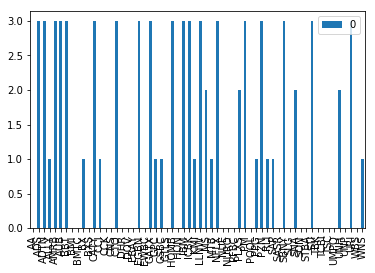

In [98]:
barPlot = finalDF.plot.bar()